In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../data/swat/swat_ieee754.csv')

In [3]:
inputs = df.iloc[:, :-1]
labels = (df.iloc[:, -1])

In [4]:
counts = labels.value_counts()

In [5]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
index = np.where(labels == 0)[0]
inputs_0 = inputs.values[index]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(inputs_0)

In [8]:
kmeans = KMeans(n_clusters=2, random_state=4)
kmeans.fit(X_scaled)
labels_0 = kmeans.labels_

/home/wangxiaobo/miniconda3/envs/py3.8_torch1.12.1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

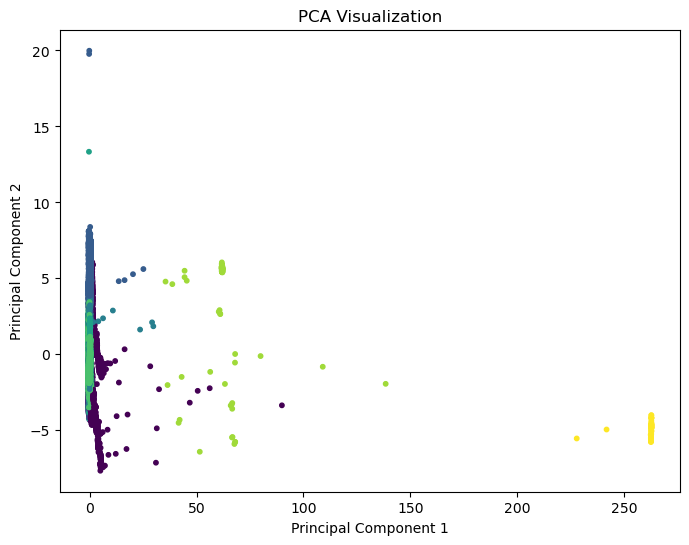

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, c=labels_0)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [12]:
labels = labels + 7

In [13]:
labels.loc[index] = labels_0

In [14]:
combined_df = pd.concat([inputs, labels], axis=1)

In [15]:
combined_df.to_csv('swat_ieee754_knn4.csv', index=False)